# Visualize Simulation Results

**Gregory Way, 2020**

Here, we visualize the top compression features implicated for the two groups of simulated signals.

Our goal is to observe how the top scoring compression features relate to each of the two groups.
Specifically, we will observe how the models' assigned signal relates to the compression feature number.

In [1]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”

In [2]:
data_file <- file.path("results", "compression_simulation_results.tsv")
data_df <- readr::read_tsv(data_file, col_types = readr::cols()) %>%
    reshape2::melt(id.vars = c("k", "algorithm", "compressed_feature"),
                   variable.name = "feature",
                   value.name = "feature_importance") %>%
    dplyr::mutate(abs_feature_importance = abs(feature_importance)) %>%
    dplyr::filter(feature %in% c("feature_1", "feature_2", "feature_3",
                                 "feature_5", "feature_6", "feature_7")) %>%
    dplyr::group_by(k, algorithm, feature) %>%
    dplyr::top_n(n = 1, wt = abs_feature_importance) %>%
    tidyr::separate(compressed_feature, into = c("alg", "feature_num"), sep = "_", remove = FALSE)

data_df$feature_num <- factor(paste(data_df$feature_num),
                              levels = c("0", "1", "2", "3", "4", "5"))

data_df$algorithm <- factor(data_df$algorithm, levels = c("PCA", "ICA", "NMF", "DAE", "VAE"))

print(dim(data_df))
head(data_df, 3)

[1] 180   8


k,algorithm,compressed_feature,alg,feature_num,feature,feature_importance,abs_feature_importance
1,PCA,pca_0,pca,0,feature_1,-0.58893749,0.58893749
1,ICA,ica_0,ica,0,feature_1,-0.02643951,0.02643951
1,NMF,nmf_0,nmf,0,feature_1,4.04774173,4.04774173


In [3]:
feature_colors = c(
    "feature_1" = "#9B4A34",
    "feature_2" = "#D59673",
    "feature_3" = "#DC9C2A",
    "feature_5" = "#291F46",
    "feature_6" = "#373443",
    "feature_7" = "#4D5575"
)

feature_labels = c(
    "feature_1" = "1",
    "feature_2" = "2",
    "feature_3" = "3",
    "feature_5" = "5",
    "feature_6" = "6",
    "feature_7" = "7"
)

simulation_theme <- theme_bw() + 
  theme(axis.text.x = element_text(size = 5.5, angle = 90),
        axis.text.y = element_text(size = 5.5),
        axis.title = element_text(size = 6.5),
        legend.text = element_text(size = 7),
        legend.title = element_text(size = 7.5),
        legend.key.size = unit(1, "lines"),
        strip.background = element_rect(colour = "black",
                                        fill = "#fdfff4"),
        strip.text.x = element_text(size = 5,
                                    margin = margin(t = 2,
                                                    b = 1.5,
                                                    l = 0,
                                                    r = 0)))

append_k <- function(string) paste0("k=", string)

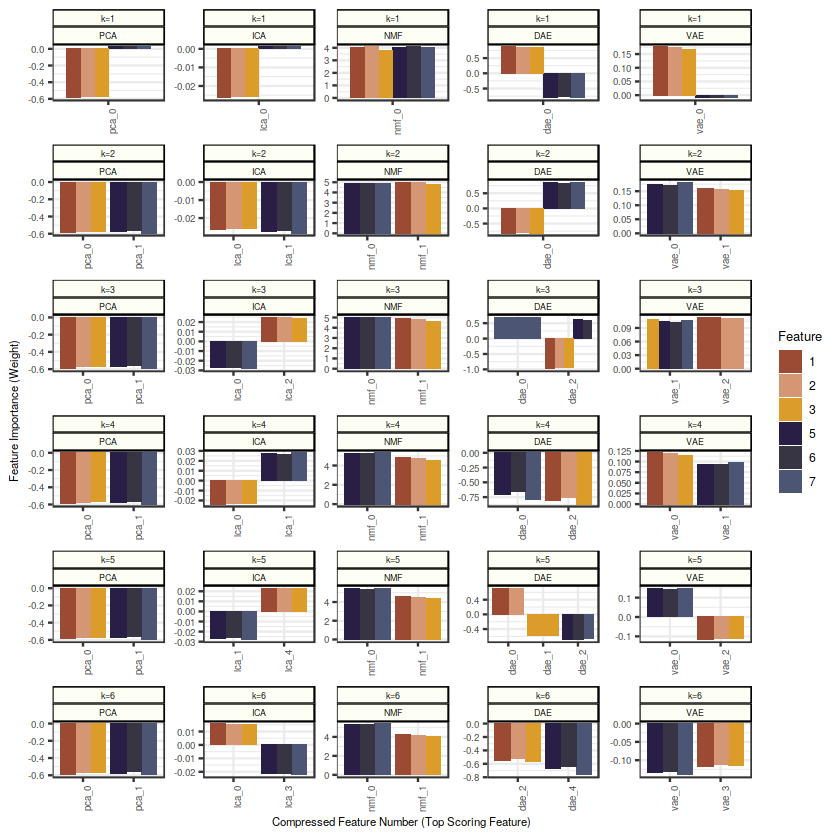

In [4]:
plot_gg <- ggplot(data_df,
       aes(x = compressed_feature, y = feature_importance)) +
    geom_bar(stat="identity", aes(fill=feature), position = position_dodge()) +
    facet_wrap(k~algorithm,
               scales = "free",
               ncol = 5,
               labeller = labeller(k = as_labeller(append_k))) +
    scale_fill_manual(values = feature_colors, labels = feature_labels, name = "Feature") +
    xlab("Compressed Feature Number (Top Scoring Feature)") +
    ylab("Feature Importance (Weight)") +
    simulation_theme

plot_gg

In [5]:
for(extension in c('.png', '.pdf')) {
    fig_file <- paste0("simulated_feature_number", extension)
    fig_file <- file.path("figures", fig_file)
    ggsave(filename = fig_file,
           plot = plot_gg,
           height = 150,
           width = 125,
           units = "mm",
           dpi = 400)
}